### Metropolis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the target distribution (multivariate standard normal)
def target_distribution(x):
    return -0.5 * np.dot(x, x)

$$
f(x) \sim e^{-\frac{1}{2} ||x||^2} = e^{-\frac{1}{2} x^Tx}
$$

In [3]:
# Set the random seed for reproducibility
np.random.seed(42)

# Define the dimensionality
dim = 50  # High-dimensional space

# Metropolis algorithm
def metropolis_sampling(target_log_prob, initial_position, n_samples, proposal_std, warm_up_period):
    total_samples = n_samples + warm_up_period
    samples = np.zeros((total_samples, len(initial_position)))
    current_position = initial_position
    current_log_prob = target_log_prob(current_position)
    
    for i in range(total_samples):
        # Propose a new position
        proposal = current_position + np.random.normal(0, proposal_std, size=dim)
        proposal_log_prob = target_log_prob(proposal)
        
        # Calculate acceptance probability
        acceptance_prob = min(1, np.exp(proposal_log_prob - current_log_prob))
        
        # Accept or reject the proposal
        if np.random.rand() < acceptance_prob:
            current_position = proposal
            current_log_prob = proposal_log_prob
        
        samples[i] = current_position
        
    # Discard the warm-up samples and return the rest
    return samples[warm_up_period:]

# Parameters
n_samples = 10 ** 6
warm_up_period = int(n_samples / 100) # Number of samples to discard for warm-up
initial_position = np.zeros(dim)
proposal_std = 0.5  # Standard deviation of the proposal distribution

# Run Metropolis sampling
samples = metropolis_sampling(target_distribution, initial_position, n_samples, proposal_std, warm_up_period)

# Analyze the samples
mean_estimate = np.mean(samples, axis=0)
covariance_estimate = np.cov(samples, rowvar=False)

print("Estimated mean (first 10 dimensions):")
print(mean_estimate[:10])

print("\nEstimated covariance matrix (first 5 dimensions):")
print(covariance_estimate[:5, :5])

Estimated mean (first 10 dimensions):
[-0.00818448  0.01164203  0.01162041 -0.02505287 -0.00981164 -0.0205562
  0.02415262 -0.00499523 -0.01986696  0.00508269]

Estimated covariance matrix (first 5 dimensions):
[[ 1.00977079 -0.00433489 -0.00120965 -0.00627657 -0.0014347 ]
 [-0.00433489  1.00935197 -0.02027121  0.00437517 -0.02469043]
 [-0.00120965 -0.02027121  0.98866931 -0.02281701 -0.00395782]
 [-0.00627657  0.00437517 -0.02281701  0.98557542 -0.02011923]
 [-0.0014347  -0.02469043 -0.00395782 -0.02011923  0.98080093]]


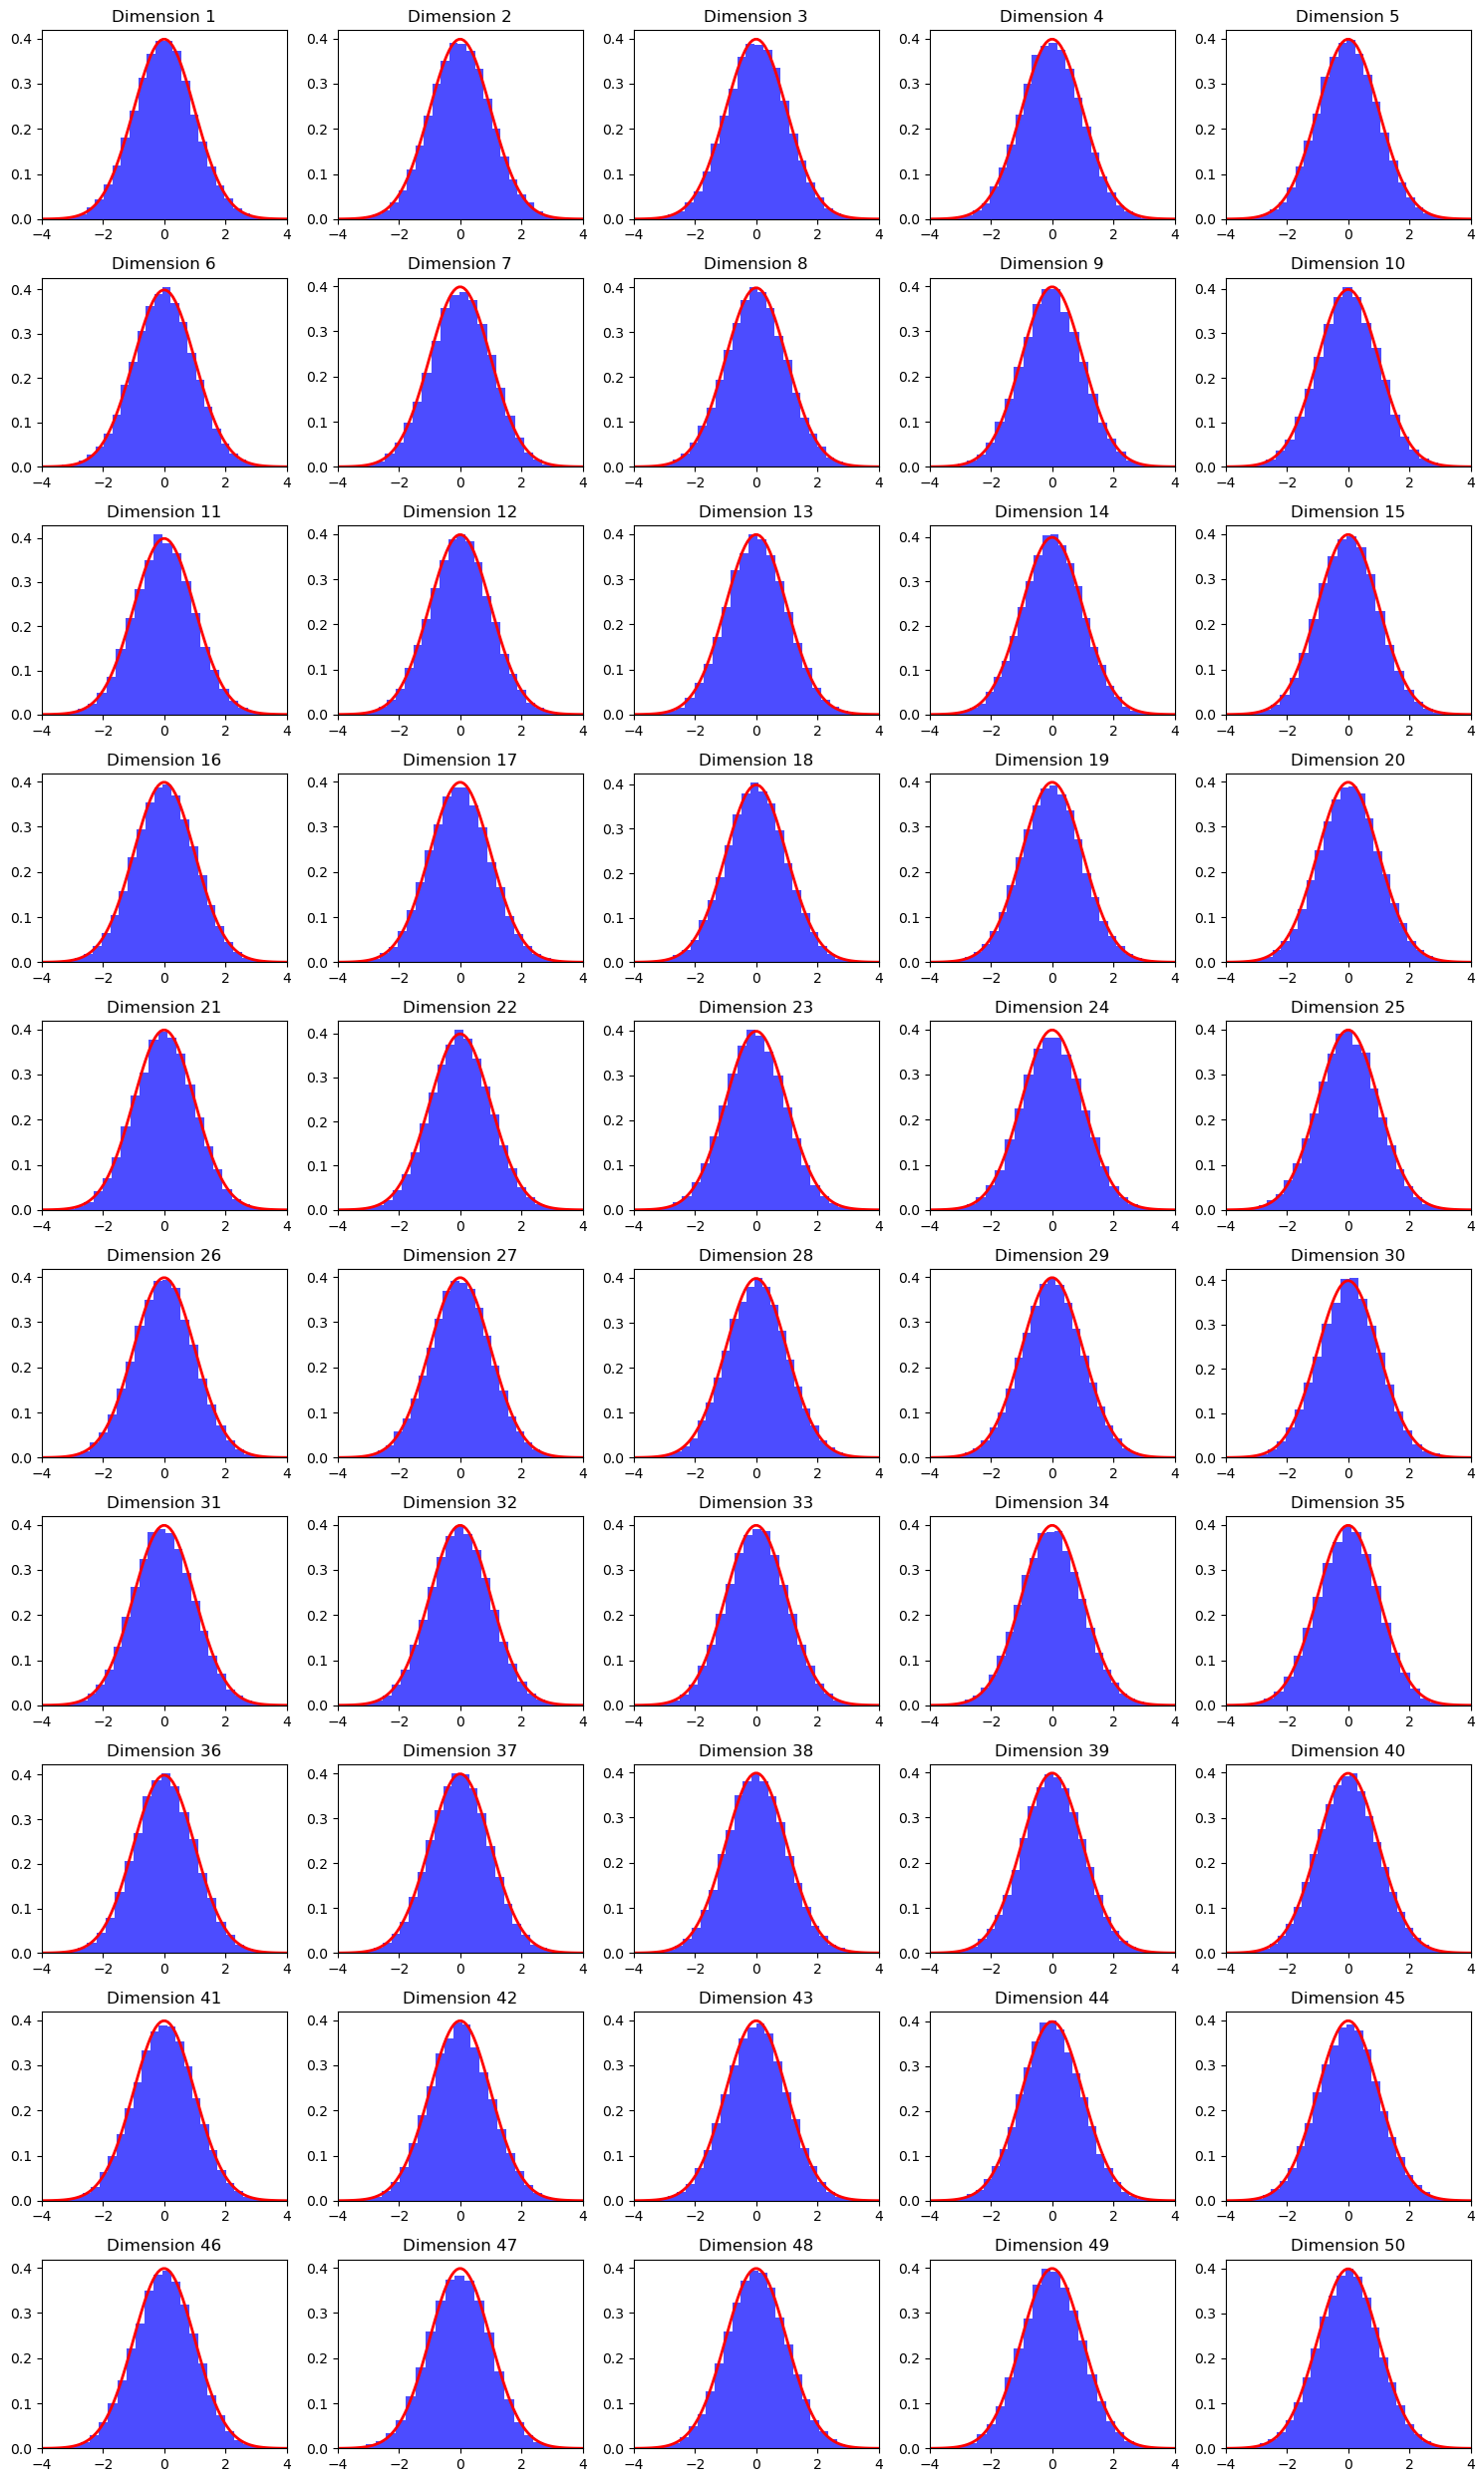

In [4]:
# Plot histograms for all dimensions
import math

num_dims = samples.shape[1]
num_cols = 5
num_rows = math.ceil(num_dims / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 2.5))
axes = axes.flatten()

for i in range(num_dims):
    ax = axes[i]
    ax.hist(samples[:, i], bins=30, density=True, alpha=0.7, color='blue')
    # Overlay the standard normal PDF for comparison
    x_vals = np.linspace(-4, 4, 100)
    ax.plot(x_vals, (1/np.sqrt(2 * np.pi)) * np.exp(-0.5 * x_vals**2), 'r', lw=2)
    ax.set_title(f'Dimension {i+1}')
    ax.set_xlim([-4, 4])

# Remove any unused subplots
for i in range(num_dims, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Metropolis可以用于高维采样。